In [1]:
# Load NeurIO objects
import sys
sys.path.append("../../")
from neurio.devices.physical.st.stm32 import STM32
from neurio.devices.callbacks import TimerSyncCallback, PowerProfilerCallback
from neurio.devices.runner import Runner
from neurio.devices.monitors.power_monitor import PowerProfilerKitII

import tensorflow as tf
import numpy as np
import os

## Setup

In [2]:
# for MacOS
user = os.environ["USER"]
os.environ["STM32CUBEPROGRAMER_CLI_PATH"] = os.path.expanduser(
    "/Applications/STMicroelectronics/STM32Cube/STM32CubeProgrammer/STM32CubeProgrammer.app/Contents/MacOs/bin/STM32_Programmer_CLI")
os.environ["X_CUBE_AI_PATH"] = os.path.expanduser(f"/Users/{user}/STM32Cube/Repository/Packs/STMicroelectronics/X-CUBE-AI/7.1.0")
os.environ["STM32CUBEIDE_PATH"] = os.path.expanduser("/Applications/STM32CubeIDE.app/Contents/MacOS/STM32CubeIDE")

## Load model and dataset

In [3]:

# load model from ./assets/experiments
model = tf.keras.models.load_model("../assets/experiments/lenet_model.h5")

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2024-02-20 15:30:11.065124: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Create log directory
log_dir = os.path.join("logs-STM32L4R9-float32-test")
# Connect STM32 and PPK device
stm_device = STM32(port='serial', device_identifier="STM32L4R9", name='stm32', verbose=1, log_dir=log_dir)
ppk2 = PowerProfilerKitII(port='/dev/cu.usbmodemF89AE991B16A2', name='ppk2', acquisition_interval=0.01, verbose=1, log_dir=log_dir)

Found PPK2 at /dev/cu.usbmodemF89AE991B16A2


## Create runner and deploy network

In [5]:
runner = Runner(stm_device, callbacks=[
    TimerSyncCallback(log_dir=log_dir, name="time_sync"),
    PowerProfilerCallback(ppk2)

])

In [6]:
runner.prepare_for_inference(model)

2024-02-20 15:30:14.430675: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/j_/1kx7__wx15d4bvtts4f0h18r0000gq/T/tmp9gaok7l8/assets


2024-02-20 15:30:16.768761: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2024-02-20 15:30:16.768776: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2024-02-20 15:30:16.769366: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/j_/1kx7__wx15d4bvtts4f0h18r0000gq/T/tmp9gaok7l8
2024-02-20 15:30:16.771137: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2024-02-20 15:30:16.771147: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/j_/1kx7__wx15d4bvtts4f0h18r0000gq/T/tmp9gaok7l8
2024-02-20 15:30:16.778598: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2024-02-20 15:30:16.827867: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /var/folders/j_/1kx7__wx15d4bvtts4f0h18r0000gq/T/tmp9gaok7l8
2024-02

Generating model c files: logs-STM32L4R9-float32-test/tflite_model.tflite
/Users/sni/STM32Cube/Repository/Packs/STMicroelectronics/X-CUBE-AI/7.1.0/Utilities/mac/stm32ai generate -m logs-STM32L4R9-float32-test/tflite_model.tflite -o /Users/sni/Documents/Projects/ANDANTE/Benchmarking/neurio/examples/notebooks/../../neurio/devices/physical/st/assets/STM32L4R9


IOC file found in the output directory
Neural Network Tools for STM32AI v1.6.0 (STM.ai v7.1.0-RC3)
PASS:  89%|████████▊ | 77/87 [00:00<00:00, 168.51it/s]

fatal: not a git repository (or any of the parent directories): .git


                                                      
 Generated files (5)
 ----------------------------------------------------------------------------------------------------------------------------------------------
 /Users/sni/Documents/Projects/ANDANTE/Benchmarking/neurio/neurio/devices/physical/st/assets/STM32L4R9/X-CUBE-AI/App/network_config.h
 /Users/sni/Documents/Projects/ANDANTE/Benchmarking/neurio/neurio/devices/physical/st/assets/STM32L4R9/X-CUBE-AI/App/network.h
 /Users/sni/Documents/Projects/ANDANTE/Benchmarking/neurio/neurio/devices/physical/st/assets/STM32L4R9/X-CUBE-AI/App/network.c
 /Users/sni/Documents/Projects/ANDANTE/Benchmarking/neurio/neurio/devices/physical/st/assets/STM32L4R9/X-CUBE-AI/App/network_data.h
 /Users/sni/Documents/Projects/ANDANTE/Benchmarking/neurio/neurio/devices/physical/st/assets/STM32L4R9/X-CUBE-AI/App/network_data.c
                                                      
Creating txt report file /Users/sni/Documents/Projects/ANDANTE/Benchmarki

# Perform inference

In [7]:
# Prepare data
i = 0
batch_size = 32
x_test = x_test[(i*batch_size):(i+1)*batch_size]
y_test = y_test[(i*batch_size):(i+1)*batch_size]

input_data = x_test.astype(np.float32)
input_data = input_data.reshape((-1, 28, 28, 1))

In [8]:
pred, prof = runner.infer(input_x=input_data, batch_size=1)

print(pred)

  0%|                                                                                                                        | 0/32 [00:00<?, ?it/s]/Users/sni/Documents/Projects/ANDANTE/Benchmarking/neurio/examples/notebooks/../../neurio/devices/physical/st/stm32.py:196: UserWarning: Data is transfered during inference, no need to transfer it before
  warnings.warn("Data is transfered during inference, no need to transfer it before")
/Users/sni/Documents/Projects/ANDANTE/Benchmarking/neurio/examples/notebooks/../../neurio/devices/physical/st/stm32.py:220: UserWarning: Data is send back by AiRunner after inference, no need to transfer it after
  warnings.warn("Data is send back by AiRunner after inference, no need to transfer it after")
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [02:46<00:00,  5.20s/it]

[[[[[3.49644883e-21 6.76132414e-11 6.19836005e-09 2.10368160e-18
     5.13264586e-09 1.95336068e-16 1.44408532e-25 1.00000000e+00
     1.18857990e-09 4.96130810e-11]]]]



 [[[[5.64743336e-15 3.64233893e-10 1.00000000e+00 3.40933894e-08
     2.57999113e-12 1.48917252e-14 1.12035992e-10 1.65059997e-11
     1.05708789e-10 4.18230437e-15]]]]



 [[[[5.75347437e-33 1.00000000e+00 6.13637165e-19 3.52194929e-29
     6.25080381e-23 1.00376050e-23 1.09236218e-19 5.48620322e-22
     1.59697167e-15 8.91281229e-20]]]]



 [[[[9.99973655e-01 1.95753257e-11 2.88771286e-12 4.92527602e-14
     7.84135090e-10 4.57144296e-08 2.63476886e-05 1.87074802e-13
     8.30204461e-10 1.43965270e-10]]]]



 [[[[1.20657455e-12 1.68282011e-08 2.91326643e-07 7.92822432e-14
     9.81546879e-01 7.43644799e-11 5.72736828e-15 3.72135162e-07
     1.94716904e-06 1.84503980e-02]]]]



 [[[[1.00985633e-29 1.00000000e+00 1.94912538e-16 4.27892372e-29
     4.13018207e-19 8.73599604e-26 1.66621989e-18 3.81018713e-20
     1.484

## Plot Inference results

In [12]:
import json 

with open(os.path.join(log_dir, "ppk2_recording.json"), "r") as f:
    data = json.load(f)

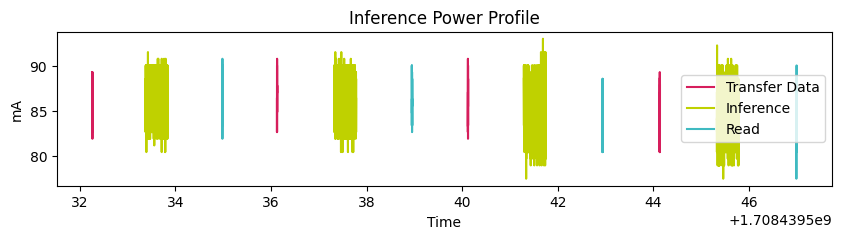

In [33]:
import matplotlib.pyplot as plt

phase_colors = {"prepare_for_inference": "#A8A8A8",
                "generate_inference_code":"#FFD8D8",
                "deploy_model": "#00FFFF",
                "deploy_code":"#0000FF",
                "prepare_data": "#C8C8C8",
                "transfer_data_to_memory": "#D61E5C",
                "run_inference": "#BFD100", 
                "read_inference_results": "#3FBAC1"}

figure = plt.figure(figsize=(10,2))
all_samples = []
last_time=0
#last_time = data[0]["start_timestamp"]
for phase in data[:12]:
    
    samples = np.asarray(phase["samples"])/1000
    if max(samples)>200:
        samples = []
    #samples = samples[samples<100]
    if len(samples)==0:
        continue
        
    t_in = phase["start_timestamp"]
    t_ou = phase["stop_timestamp"]
    delta = (t_ou-t_in)/len(samples)
    times = np.arange(t_in, t_ou, delta)[:len(samples)]
    last_time = t_ou
    
    plt.plot(times, samples, "-", markersize=2, label=phase["phase"], color=phase_colors[phase["phase"]])
plt.legend(["Transfer Data", "Inference","Read"], loc="right", bbox_to_anchor=(0,0,1,1))
plt.title("Inference Power Profile")
plt.xlabel("Time")
plt.ylabel("mA")
plt.show()